<h1 style=color:blue>Projeto de análise de tweets

In [1]:
import tweepy
import GetOldTweets3
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import nltk
import spacy
import re
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import RegexpTokenizer
import nltk.data
from nltk.tokenize import PunktSentenceTokenizer
from nltk.corpus import webtext
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.stem import RegexpStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud

### Parte 1 - Função que extrai os tweets e converte em um dataframe

In [2]:
def projeto(username,save="yes"):
    consumer_key = "sua chabe"
    consumer_secret = "seu segredo"
    access_token = "seu token de acesso"
    access_token_secret = "seu token secreto"

    #Inserindo chave e segredo do usuário 
    #auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
    auth = tweepy.OAuthHandler('', '')
    auth.set_access_token('','')

    # Access to user's access key and access secret 
    #auth.set_access_token(access_token, access_token_secret) 

    #Chamando a API do Twitter
    api = tweepy.API(auth) 

   
    n=200
    todos = []  

    #chamando o usuário, com o número máximo de 200 tweets por chamada, autorizada pela própria API
    #Usei o modo extenso para ler o tweet por inteiro e excluir os retweets, que não interessa nesse projeto
    novo = api.user_timeline(screen_name = username,count=n,tweet_mode = 'extended',include_rts = False)

    #salvando os mais novos tweets
    todos.extend(novo)

    #salvando o último id do tweet para recuperar os tweets mais antigos além de 200
    antigos = todos[-1].id - 1

    #capturando novos tweets até que não seja mais possível, seja porque não tem mais, seja porque atingiu o máximo autorizado pela API
    while len(novo) > 0:

        #Para evitar duplicidade, adota-se o último id
        novo = api.user_timeline(screen_name = username,count=1000,max_id=antigos,tweet_mode = 'extended',include_rts = False)

        #salvar os mais recentes tweets
        todos.extend(novo)

        #atualizar os ids
        antigos = todos[-1].id - 1

    c = []
    for i in todos:
        a = i.full_text.replace("\n","") #retirando os \n de espaçamento entre linhas
        b = i.created_at #acrescentando data
        c.append([a,b]) #anexando
    df = pd.DataFrame(c) #criando data frame
    df.columns = ['Tweets','Data'] #nomes das colunas
    #salvando em excel - opcional
    if save=='yes':
        df.to_excel(username+'.xlsx')
    return df

### Parte 2 - removendo stopwords, links e outras palavras que achei conveniente para a análise de alguns nomes de políticos

In [3]:
def process(df):
    xx = [] 
    for i in df['Tweets'].values:
        a = re.sub(r"http\S+", "", i) #removendo links
        xx.append(a)
    p = list(stopwords.words('portuguese')) #stopwords em português
    k = ["obrigado","abraço","abraco","sim","nao","não","brasil","aqui","aí","tmj","mim","lo","lá",
        "abracao","abração","vlw","valeu","hein","ali","blz","abraços","abracos","todo","sobre",
        "apenas","só","toda","pois","pra","entao","onde","sendo","tão","tal","ser","ter","haver","ainda",
        "que","desse","dessa","têm","tudo","quanto"] #acrescentando outras stopwords
    for i in k:
        p.append(i) #anexando numa lista
    
    azz = []
    for i in xx:
        op = []
        for j in i.split(' '):
            if j.lower() not in p: #colocando tudo em minúsculo para comparar com a lista de stopwords
                jj = str(j.lower()) #se não estiver naquele conjunto, anexar
                op.append("".join(jj.lower()))
        azz.append(" ".join(op))
    return azz

### Testando com outros políticos - PSOL e PSL

### PSOL: Samia Bonfim, Guilherme Boulos, Marcelo Freixo, Fernanda Melchinonna 

### PSL: Zambelli, Daniel Silveira, Bibo Nunes e Eduardo Bolsonaro

### Sem partido, mas muito ativos no Twitter e na política no espectro da direita: Sérgio Moro, Olavo de Carvalho, Rodrigo Constantino, Caio Copolla

## PSL

In [4]:
username = ['danielPMERJ','bibonunes1','CarlaZambelli38','BolsonaroSP']

In [5]:
dff=[projeto(i) for i in username]

In [6]:
azz = [process(i) for i in dff]

In [7]:
p = list(stopwords.words('portuguese')) #stopwords em português
k = ["obrigado","abraço","abraco","sim","nao","não","brasil","aqui","aí","tmj","mim","lo","lá",
     "abracao","abração","vlw","valeu","hein","ali","blz","abraços","abracos","todo","sobre",
     "apenas","só","toda","pois","pra","entao","onde","sendo","tão","tal","ainda","ser",'haver',"ter",
     "que","desse","dessa","têm","tudo","quanto"] #acrescentando outras stopwords
for i in k:
    p.append(i) #anexando numa lista

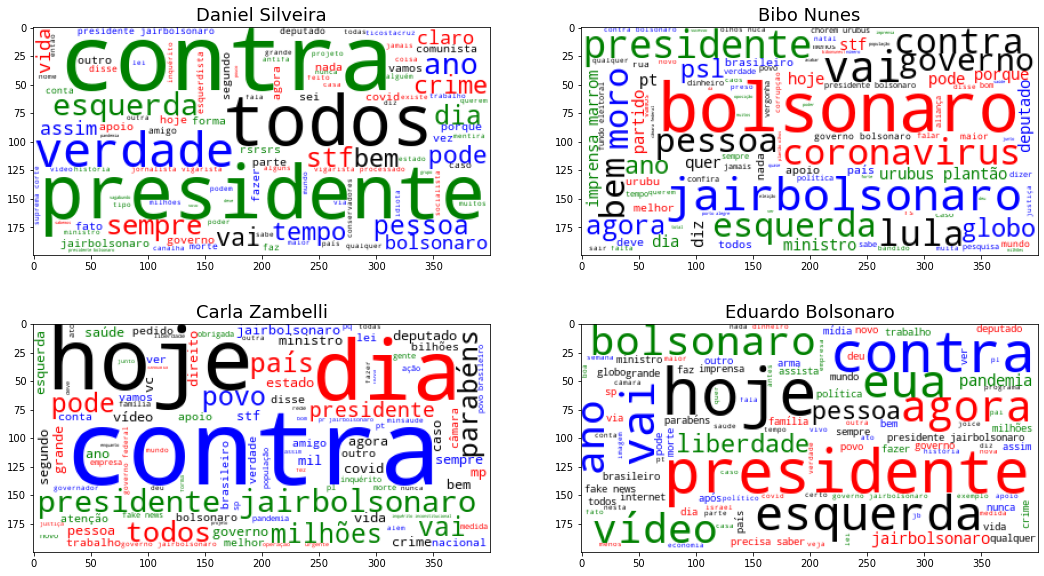

In [26]:
m = ListedColormap(['blue','red','green','black']) #cores do wordcloud
n = WordCloud(background_color= 'white',colormap=m,stopwords=p,max_words=100)

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(18,10))
n.generate("".join(azz[0]))
ax1.set_title('Daniel Silveira',fontsize=18)
ax1.imshow(n)

n.generate("".join(azz[1]))
ax2.set_title('Bibo Nunes',fontsize=18)
ax2.imshow(n)

n.generate("".join(azz[2]))
ax3.set_title('Carla Zambelli',fontsize=18)
ax3.imshow(n)

n.generate("".join(azz[3]))
ax4.set_title('Eduardo Bolsonaro',fontsize=18)
ax4.imshow(n)

plt.show()

Os 4 políticos citados são deputados apoiadores incondicionais do presidente, explicando a alta frequência da palavra bolsonaro. Curiosamente a palavra contra aparece frequentemente no tweet dos 4 políticos, indicando ataques à aquilo que julgam oposição. Como julgam aqueles que criticam as ações do governo federal como esquerda, a mesma palavra também aparece com frequência.

Bibo Nunes possui uma postura de ataque à imprensa, indicado pelas palavra imprensa marrom e globo.

Eduardo Bolsonaro foi cotado para ser embaixador nos EUA e possui postura de apoio às medidas tomadas por esse país, explicando o aparecimento da palavra eua.

## PSOL

In [9]:
username2 = ['MarceloFreixo','GuilhermeBoulos','fernandapsol','samiabomfim']
dff2 = [projeto(i) for i in username2]

In [10]:
azz2 = [process(i) for i in dff2]

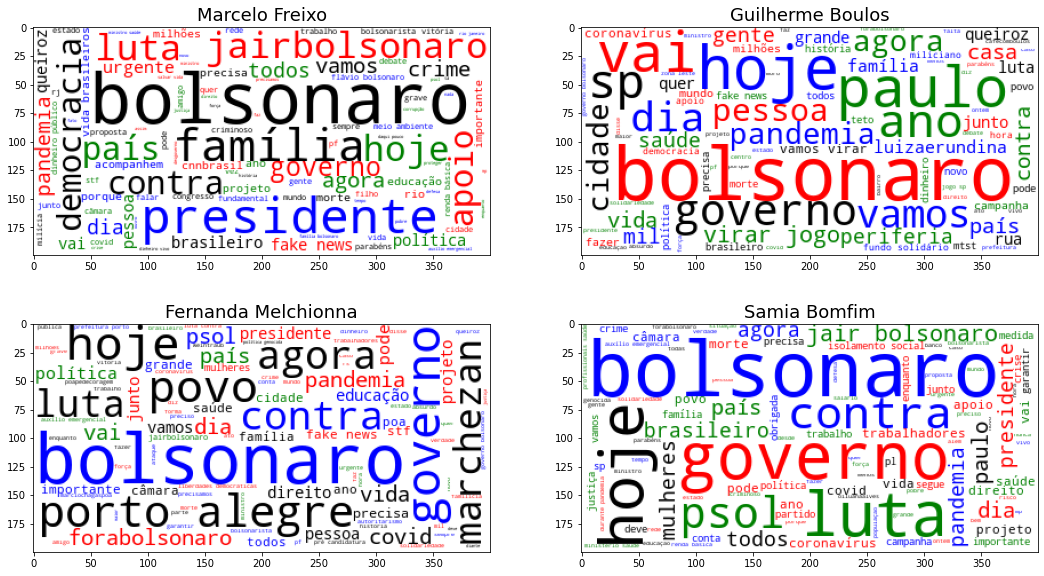

In [27]:
m = ListedColormap(['blue','red','green','black']) #cores do wordcloud
n = WordCloud(background_color= 'white',colormap=m,stopwords=p,max_words=100)

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(18,10))
n.generate("".join(azz2[0]))
ax1.set_title('Marcelo Freixo',fontsize=18)
ax1.imshow(n)

n.generate("".join(azz2[1]))
ax2.set_title('Guilherme Boulos',fontsize=18)
ax2.imshow(n)

n.generate("".join(azz2[2]))
ax3.set_title('Fernanda Melchionna',fontsize=18)
ax3.imshow(n)

n.generate("".join(azz2[3]))
ax4.set_title('Samia Bomfim',fontsize=18)
ax4.imshow(n)

plt.show()

O PSOL é um dos partidos com oposição mais intensa ao governo do Bolsonaro. Portanto, os temas dos 4 políticos mais relevantes do PSOL remete às críticas ao presidente, evidenciado pela frequência da palavra Bolsonaro.

Boulos e Melchionna são candidatos à prefeitura de São Paulo e Porto Alegre, respectivamente, explicando o aparecimento frequente de palavras remetendo às suas respectivas cidades. No caso de Melchionna há possíveis críticas ao atual prefeito Marchezan, explicando o aparecimento dessa palavra. Boulos tem histórico de trabalhos na periferia, explicando o aparecimento dessa palavra. Além disso, como remete frequentemente à sua vice Luiza Erundina, o termo luizaerundina também está na nuvem de palavras. Pela postura fortemente crítica do PSOL em relação à atuação do governo federal na pandemia causada pelo COVID-19, as palavras pandemia, covid e coronavírus aparecem frequentemente nos tweets dos 4 políticos.

Fernanda Melchionna e Samia Bomfim possuem forte ligação com movimentos feministas e isso é evidenciado pela palavra mulheres nos tweets das duas deputadas.

### Direita

In [23]:
username4 = ['BoletimCoppolla','SF_Moro','opropriolavo','RConstantino']
dff4 = [projeto(i) for i in username4]

C:\Users\rober\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:931: UserWarning: Ignoring URL 'https://t.co/rngERCmcmk%20de%2017/10Sobre%20o%20teatro%20no%20STF,%20artigo%20da%20procuradora%20@thameadanelon%20,%20vídeo%20visceral%20do%20prof%20@jose_neumanne%20e%20pensamentos%20de%20@alexisfonteyne%20@paulomartins10%20@carvalhosamo%20@augustosnunes%20.Na%20pauta,%20números%20da%20desigualdade%20analisados%20por%20@rconstantino%20https://t.co/H6Mu2QFeox' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))
C:\Users\rober\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:931: UserWarning: Ignoring URL 'https://t.co/UvmQKC4Di2CANDIDATURAS%20INDEPENDENTES:%20no%20https://t.co/lExXqatJGS%20@RodrigoMezzomo%20é%20entrevistado%20por%20@BrunoGarschagen%20@Rconstantino%20e%20@thiagouberreich%20.%20Também%20no%20Boletim,%20artigo%20de%20@GFiuza_Oficial%20e%20pensamentos%20de%20@filgmartin%20@flaviogordon%20e%20@leandroruschel%20bom%20fd

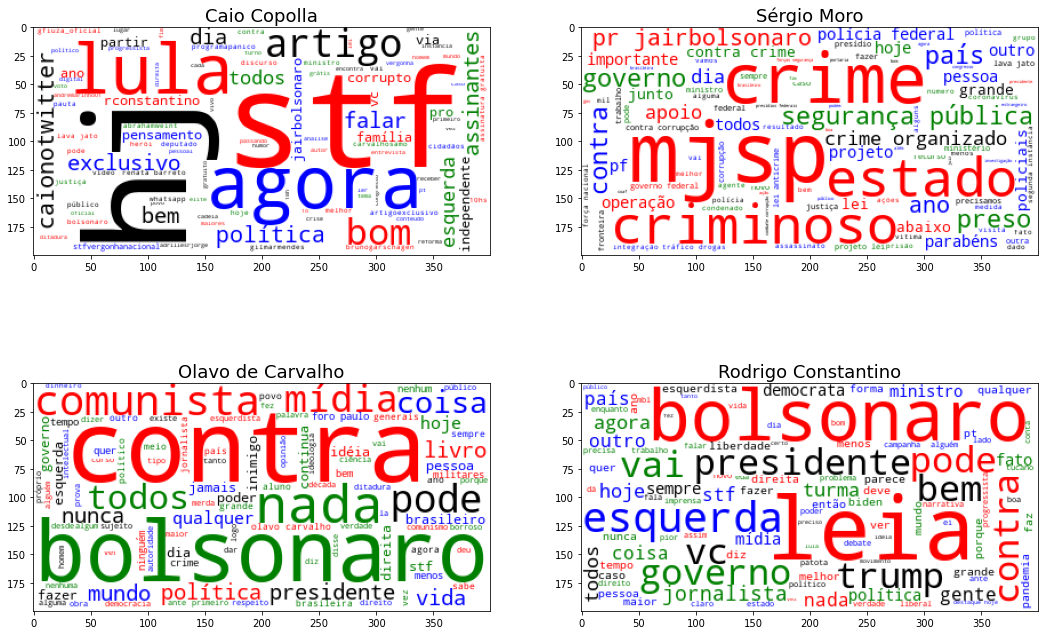

In [24]:
azz4 = [process(i) for i in dff4]
m = ListedColormap(['blue','red','green','black']) #cores do wordcloud
n = WordCloud(background_color= 'white',colormap=m,stopwords=p,max_words=100)

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(18,12))
n.generate("".join(azz4[0]))
ax1.set_title('Caio Copolla',fontsize=18)
ax1.imshow(n)

n.generate("".join(azz4[1]))
ax2.set_title('Sérgio Moro',fontsize=18)
ax2.imshow(n)

n.generate("".join(azz4[2]))
ax3.set_title('Olavo de Carvalho',fontsize=18)
ax3.imshow(n)

n.generate("".join(azz4[3]))
ax4.set_title('Rodrigo Constantino',fontsize=18)
ax4.imshow(n)

plt.show()

Pela nuvem de palavras obtidas pelos tweets do Olavo de Carvalho nota-se uma postura de oposição a alguma coisa, provavelmente ao comunismo, dado o histórico da pessoa e pela palavra comunista e esquerda encontradas na nuvem de palavras. O presidente também aparece com frequência nos tweets dele. 

Rodrigo Constantino é um ideólogo, também da direita, tem um número de tweets fortemente críticos à esquerda, haja vista a palavra esquerda e o termo depreciativo esquerdista estar predominante na nuvem de palavras. O termo contra também aparece com força na nuvem de palavras. O termo leia indica direcionamento para algum artigo, possivelmente dele mesmo, considerando que ele escreva artigos na Jovem Pan. Possivelmente ele fez um número elevados de tweets defendendo Trump e Bolsonaro, uma vez que essas palavras estejam intensas na nuvem de palavras.

Sérgio Moro é um ex-juiz e ex-ministro da justiça e segurança e em seus tweets há palavras fortemente relacionadas ao seu meio, como crime, criminoso, segurança e mjsp.

Caio Copolla tem um perfil fortemente de direita também. Como os demais, critica fortemente o STF e isso pode ser evidenciado pela quantidade de vezes que essa palavra apareceu. Apareceu também a palavra Lula, o ex-presidente, indicando possivelmente críticas ao mesmo. Curiosamente, dentre os nomes mais relevantes da direita, chama a atenção de ser o único citando com frequência o ex-presidente e o líder do Partido dos Trabalhadores (PT). Caio Coppolla gosta de parecer independente e ressalta com frequência em seus discursos, explicando a palavra independente aparecer com frequência.

In [14]:
username5 = ['jairbolsonaro']
dff5 = [projeto(i) for i in username5]

In [15]:
def process(df):
    xx = [] 
    for i in df['Tweets'].values:
        a = re.sub(r"http\S+", "", i) #removendo links
        xx.append(a)
    p = list(stopwords.words('portuguese')) #stopwords em português
    k = ["obrigado","abraço","abraco","sim","nao","não","brasil","aqui","aí","tmj","mim","lo","lá",
        "abracao","abração","vlw","valeu","hein","ali","blz","abraços","abracos","todo","sobre",
        "apenas","só","toda","pois","pra","entao","onde","sendo","tão","tal","ser","ter","haver","ainda",
        "que","desse","dessa","têm","tudo","quanto"] #acrescentando outras stopwords
    for i in k:
        p.append(i) #anexando numa lista
    
    azz = []
    for i in xx:
        op = []
        for j in i.split(' '):
            if j.lower() not in p: #colocando tudo em minúsculo para comparar com a lista de stopwords
                jj = str(j.lower()) #se não estiver naquele conjunto, anexar
                op.append("".join(jj.lower()))
        azz.append(" ".join(op))
    return azz

In [16]:
p = list(stopwords.words('portuguese')) #stopwords em português
k = ["obrigado","abraço","abraco","sim","nao","não","brasil","aqui","aí","tmj","mim","lo","lá",
     "abracao","abração","vlw","valeu","hein","ali","blz","abraços","abracos","todo","sobre",
     "apenas","só","toda","pois","pra","entao","onde","sendo","tão","tal","ainda","ser",'haver',"ter",
     "que","desse","dessa","têm","tudo","quanto"] #acrescentando outras stopwords
for i in k:
    p.append(i) #anexando numa lista

In [17]:
azz5 = [process(i) for i in dff5]
m = ListedColormap(['blue','red','green','black']) #cores do wordcloud
n = WordCloud(background_color= 'white',colormap=m,stopwords=p,max_words=100)

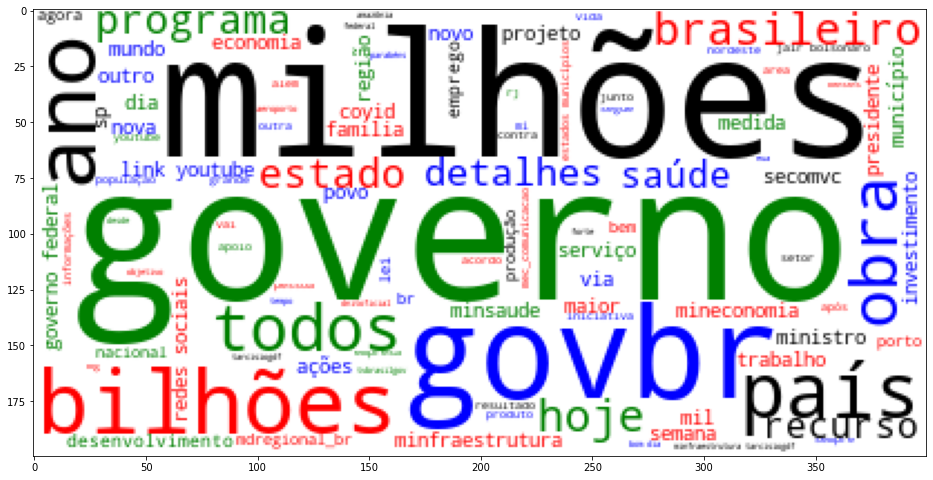

In [18]:
plt.figure(figsize=(16,11))
n.generate("".join(azz5[0]))
plt.imshow(n)

Há uma diferenciação dos tweets do presidente ao longo do tempo. Em época pré-eleitoral, a nuvem de palavras tinha palavras predominantemente voltadas para ataques ao PT e à esquerda, em geral. Agora, o presidente parece adotar uma postura mais conciliatória no Twitter, mais preocupado em mostrar os feitos de seu governo, refletido nas palavras governo, govbr, bilhões, milhões, obra, investimento, recurso e programa.